In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
%matplotlib inline

**1. ENCONTRAR LOS DATOS**

In [3]:
muertes = pd.read_csv('DEFUNCIONES_DEIS.csv',
                   sep = ';', encoding = 'latin-1')
#Datos sacados del DEIS
#Muertes por Comuna

In [4]:
vacunas = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis.csv')
#Vacunas por Comuna
#Se consideró solo con la segunda dosis por eficacia de las vacunas

In [5]:
riqueza = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
#Indice de Desarrollo Humano por Región



**2. LIMPIEZA DE DATOS**



In [6]:
muertes.columns = ['Año','Fecha','Sexo','Código_Edad','Edad','Código_Comuna','Comuna','Región','Código_Diagnóstico',
               'Capítulo_Diagnóstico','Diagnóstico1','Código_Grupo','Grupo_Diagnóstico','Código_Categoría',
               'Categoría_Diagnóstico','Código_Subcategoría','Subcategoría_Diagnóstico1','Diagnóstico2','Código_Capítulo2',
               'Capítulo_Diagnóstico2','Código_Grupo2','Grupo_Diagnóstico2','Código_Categoría2','Categoría_Diagnóstico2',
               'Código_Subcategoría2','Subcategoría2', 'Lugar']
#Los datos venían con encabezados en archivo adj.

In [7]:
muertes = muertes.drop(['Año','Sexo','Región','Comuna','Código_Edad','Edad','Código_Diagnóstico','Capítulo_Diagnóstico','Código_Grupo','Código_Categoría',
           'Código_Subcategoría','Diagnóstico2','Código_Capítulo2','Capítulo_Diagnóstico2', 'Código_Grupo2','Grupo_Diagnóstico2',
           'Código_Categoría2','Categoría_Diagnóstico2', 'Código_Subcategoría2','Subcategoría2', 'Lugar', 'Diagnóstico1','Grupo_Diagnóstico',
            'Categoría_Diagnóstico'], axis =1)
#Se eliminan los datos que no utilizaremos.
#Se consideró como causa de muerte la subcategoría del diagnostico1

In [8]:
muertes = muertes.dropna()



**3. Tratamiento 'muertes por semana'**



In [9]:
muertes['Fecha'] = pd.to_datetime(muertes['Fecha'])

In [10]:
muertes = muertes.sort_values(['Fecha'], ascending = True)

In [11]:
muertes = muertes[muertes['Fecha'] > '2020-12-23']
#Se consderó desde la fecha del inicio de vacunación

In [12]:
muertes = muertes[muertes.Subcategoría_Diagnóstico1.str.contains('COVID')]
#Muertes por COVID

In [13]:
muertes = muertes[muertes['Código_Comuna'] < 14000]
muertes = muertes[muertes['Código_Comuna'] > 13000]
#Se consideró solo la RM

In [14]:
muertes.insert(3,'Fallecidos', 1, allow_duplicates = True)

In [15]:
muertes.insert(1, 'Semana', 1, allow_duplicates = True)


In [16]:
muertes['Semana'] = muertes['Fecha'].dt.week

<ipython-input-16-bf40a4ec933a>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  muertes['Semana'] = muertes['Fecha'].dt.week


In [17]:
muertes1 = muertes.groupby (by =['Semana']).Fallecidos.count().reset_index()

In [18]:
muertes1

,Semana,Fallecidos
0,1,151
1,2,156
2,3,175
3,4,180
4,5,182
5,6,205
6,7,186
7,8,200
8,9,183
9,10,240


In [19]:
vacunas = vacunas.drop(['Region', 'Codigo region', 'Poblacion'], axis = 1)

In [20]:
vacunas = vacunas.dropna()

In [21]:
vacunas = vacunas[vacunas['Codigo comuna'] > 13000]
vacunas = vacunas[vacunas['Codigo comuna'] < 14000]
#Se consideraró solo la RM.

In [22]:
vacunas

,Comuna,Codigo comuna,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,...,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09
88,Alhue,13502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.0,120.0,104.0,1.0,0.0,79.0,71.0,66.0,52.0,61.0
89,Buin,13402.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1079.0,432.0,232.0,143.0,1.0,383.0,460.0,514.0,638.0,124.0
90,Calera de Tango,13403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,171.0,122.0,75.0,9.0,2.0,129.0,73.0,112.0,133.0,122.0
91,Cerrillos,13102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562.0,360.0,197.0,117.0,6.0,202.0,242.0,354.0,365.0,186.0
92,Cerro Navia,13103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,834.0,577.0,365.0,384.0,30.0,441.0,454.0,485.0,505.0,444.0
93,Colina,13301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,765.0,568.0,555.0,10.0,3.0,615.0,496.0,522.0,684.0,648.0
94,Conchali,13104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1152.0,651.0,348.0,141.0,0.0,311.0,303.0,398.0,550.0,570.0
95,Curacavi,13503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,326.0,94.0,81.0,1.0,0.0,65.0,93.0,87.0,90.0,152.0
96,El Bosque,13105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,660.0,430.0,220.0,117.0,5.0,556.0,523.0,698.0,892.0,566.0
97,El Monte,13602.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,245.0,102.0,58.0,105.0,0.0,140.0,100.0,106.0,124.0,122.0


In [23]:
vacunas = vacunas.sort_values(['Codigo comuna'], ascending = True)

In [24]:
vacunas['Vacunados'] = vacunas.iloc[:, 3:201].sum(axis = 1)

In [25]:
riqueza = riqueza.drop(['LEI', 'II', 'EI', 'idh'], axis = 1)

In [26]:
data = muertes[['Código_Comuna', 'Fallecidos']]

In [27]:
data = data.groupby (by =['Código_Comuna']).Fallecidos.count().reset_index()

In [28]:
vacuna = vacunas['Vacunados']

In [29]:
V = []

In [30]:
for I in vacuna:
    V.append(I)

In [31]:
data = data.assign(Vacunados = V)

In [32]:
nivel = riqueza['HDI']

In [33]:
L = []

In [34]:
for I in nivel:
    L.append(I)

In [35]:
data = data.assign(HDI = L)

In [36]:
data

,Código_Comuna,Fallecidos,Vacunados,HDI
0,13101,287,258780.0,0.861222
1,13102,94,42562.0,0.764616
2,13103,250,59675.0,0.718874
3,13104,205,78435.0,0.749584
4,13105,238,80848.0,0.742015
5,13106,159,80959.0,0.767604
6,13107,140,69776.0,0.712375
7,13108,142,79199.0,0.763935
8,13109,151,52381.0,0.850780
9,13110,461,237712.0,0.795888


**4. GRÁFICOS**

[[1.         0.02704118]
 [0.02704118 1.        ]]


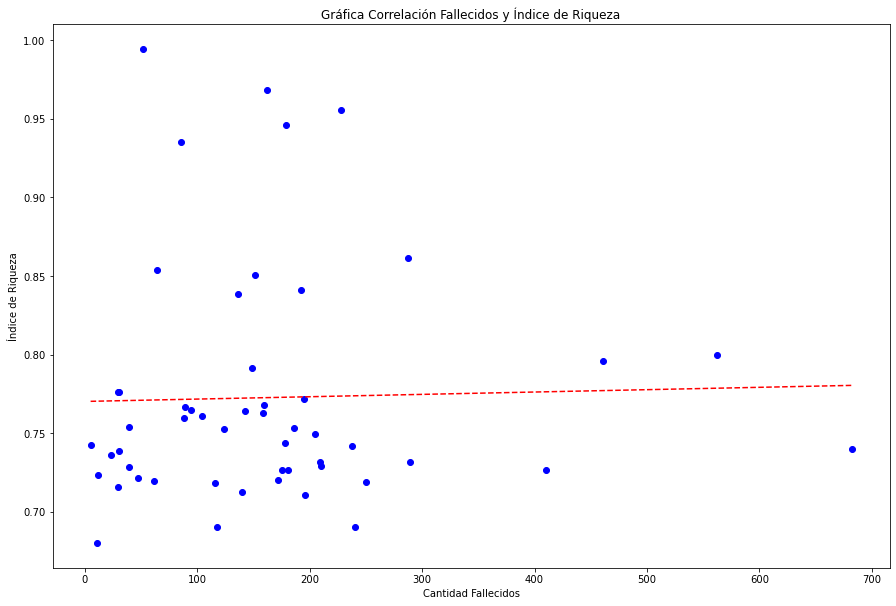

In [37]:
fig, ax = plt.subplots(figsize = (15,10))
X = data['Fallecidos']
Y = data['HDI']

print(np.corrcoef(X,Y))

plt.scatter(X, Y, color = 'blue')
plt.title('Gráfica Correlación Fallecidos y Índice de Riqueza')
plt.xlabel('Cantidad Fallecidos')
plt.ylabel('Índice de Riqueza')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X,Y,1))(np.unique(X)), 'r--')
plt.show()

In [38]:
corr_test = pearsonr(x = data['Fallecidos'], y = data['HDI'])
print ('COEF: ', corr_test[0])
print('P-value: ', corr_test[1])

COEF:  0.02704117613837187
P-value:  0.8490809159887946


[[1.         0.47763074]
 [0.47763074 1.        ]]


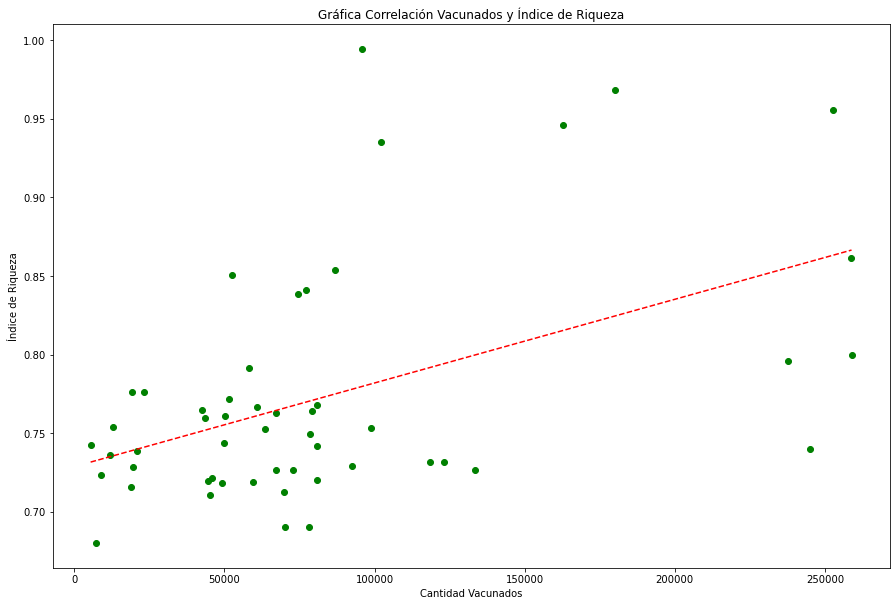

In [39]:
fig, ax = plt.subplots(figsize = (15,10))
X = data['Vacunados']
Y = data['HDI']

print(np.corrcoef(X,Y))

plt.scatter(X, Y, color = 'green')
plt.title('Gráfica Correlación Vacunados y Índice de Riqueza')
plt.xlabel('Cantidad Vacunados')
plt.ylabel('Índice de Riqueza')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X,Y,1))(np.unique(X)), 'r--')
plt.show()

In [40]:
corr_test = pearsonr(x = data['Vacunados'], y = data['HDI'])
print ('COEF: ', corr_test[0])
print('P-value: ', corr_test[1])

COEF:  0.47763074414210416
P-value:  0.000342749714672617


**5. MODELO REGRESIÓN LINEAL**

In [41]:
res = sm.ols(formula = 'Fallecidos ~ HDI + Vacunados', data = data).fit()
print(res.params)

Intercept    629.392642
HDI         -822.584107
Vacunados      0.002035
dtype: float64


In [42]:
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:             Fallecidos   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     91.32
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.97e-17
Time:                        17:32:11   Log-Likelihood:                -287.57
No. Observations:                  52   AIC:                             581.1
Df Residuals:                      49   BIC:                             587.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    629.3926     99.401      6.332      0.0

**6. EXPLICACIÓN MODELO**

El modelo con todas las variables introducidas como predictores tiene un R2 alto (0.788), lo que significa que es capaz de explicar el 78.8% de la variabilidad observada en las defunciones. 

Como el valor del R2 ajustado es menor al del R2 se cumple, y como la diferencia es tan pequeña se puede decir que ambas variables son relevantes.

El p-value del modelo es significativo y mucho menor a 0.05 (2.97e-17) y el F-statistic es mayor a uno (91.32),por lo que se rechaza la hipotesis nula y se puede aceptar que el modelo es mejor que lo esperado es por azar, de esta manera se considera que las variables seleccionadas estan relacionadas linearmente con el target.

Como los p-value del T-test son todos menores a 0.05, se rechaza la hipotesis nula, por lo que se consideran variables releantes para el modelo de regresión lineal, lo que concuerda con el valor del R2 ajustado.

El intecept corresponde a el valor promedio de la variable de respuesta Y cuando X es cero. Por lo tanto se predice correctamente el intercepto, el total de vacunados y el índice de desarrollo humano.

Como el valor del Omnibus no es cero y el valor de Prob(Ominubus) no es uno, se rechaza la hipotesis nula, por lo que el modelo no tiene una distribución normal.

Como el valor del Skew se encuentra entre -0.5 y 0.5, significa que los datos son bastantes simetricos.

Como el valor de la Kurtosis es mayor a uno, significa que la distribución es demasiado puntiaguda. 

Con respecto a la condición de número, hay una baja colinealidad de acuerdo a los cambios en los datos.